# Import Libraries


In [1]:
# Week 7 — Cell 1: Importing Libraries (Support Vector Machines - MNIST)

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

sns.set(style="whitegrid", context="notebook")

print("Libraries imported successfully!")


Libraries imported successfully!


# Load Dataset

In [2]:
# Week 7 — Cell 2: Load MNIST dataset

# Fetch MNIST dataset from OpenML
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

X = mnist.data        # shape: (70000, 784)
y = mnist.target      # labels: '0' to '9' as strings

# Convert labels to integers
y = y.astype(int)

print("MNIST dataset loaded successfully!")
print("Feature shape:", X.shape)
print("Target shape:", y.shape)

# Show unique classes
print("Digit classes:", np.unique(y))


MNIST dataset loaded successfully!
Feature shape: (70000, 784)
Target shape: (70000,)
Digit classes: [0 1 2 3 4 5 6 7 8 9]


# Preprocess and Subset Data

In [3]:
# Week 7 — Cell 3: Preprocess & subset MNIST data

# Take a subset for faster training (standard lab practice)
# You can increase this if your system is powerful
SUBSET_SIZE = 10000

X_subset = X[:SUBSET_SIZE]
y_subset = y[:SUBSET_SIZE]

print("Subset shape:", X_subset.shape)
print("Subset target shape:", y_subset.shape)

# Feature scaling (VERY important for SVM)
scaler = StandardScaler()
X_subset_scaled = scaler.fit_transform(X_subset)

print("Feature scaling completed!")
    

Subset shape: (10000, 784)
Subset target shape: (10000,)
Feature scaling completed!


# Train Test Split

In [4]:
# Week 7 — Cell 4: Train-test split

X_train, X_test, y_train, y_test = train_test_split(
    X_subset_scaled,
    y_subset,
    test_size=0.25,
    random_state=42,
    stratify=y_subset
)

print("Training set shape:")
print(" X_train:", X_train.shape)
print(" y_train:", y_train.shape)

print("\nTesting set shape:")
print(" X_test :", X_test.shape)
print(" y_test :", y_test.shape)


Training set shape:
 X_train: (7500, 784)
 y_train: (7500,)

Testing set shape:
 X_test : (2500, 784)
 y_test : (2500,)


# Train Linear SVM Model

In [5]:
# Week 7 — Cell 5: Train Linear SVM model

# Initialize Linear SVM
svm_model = SVC(
    kernel='linear',
    random_state=42
)

# Train the model
svm_model.fit(X_train, y_train)

print("Linear SVM model trained successfully!")


Linear SVM model trained successfully!


# Predictions

In [6]:
# Week 7 — Cell 6: Predictions

# Predict digit labels on test data
y_pred = svm_model.predict(X_test)

print("Predictions generated successfully!")
print("First 20 predictions:", y_pred[:20])
print("First 20 actual labels:", y_test[:20])


Predictions generated successfully!
First 20 predictions: [8 0 9 0 2 9 7 7 4 6 1 2 6 5 7 1 9 1 9 1]
First 20 actual labels: [8 0 9 0 4 9 3 7 4 6 1 2 6 5 7 1 7 1 9 1]


# Accuracy

In [7]:
# Week 7 — Cell 7: Accuracy score

accuracy = accuracy_score(y_test, y_pred)

print(f"SVM Classification Accuracy: {accuracy * 100:.2f}%")


SVM Classification Accuracy: 90.64%


# Confusion Matrix

Confusion Matrix:
[[247   0   1   1   0   0   1   0   0   0]
 [  0 279   2   0   0   0   0   0   0   1]
 [  3   8 215   3   4   1   7   4   2   1]
 [  0   1   9 231   0  11   0   3   1   2]
 [  0   3   3   0 221   0   1   3   1  13]
 [  4   1   5   7   0 192   0   0   5   2]
 [  4   0   5   1   0   1 242   0   0   0]
 [  1   3   3   1   9   0   0 234   0  16]
 [  2   8  11   8   1   8   3   1 194   0]
 [  1   2   1   6  12   1   0   9   2 211]]


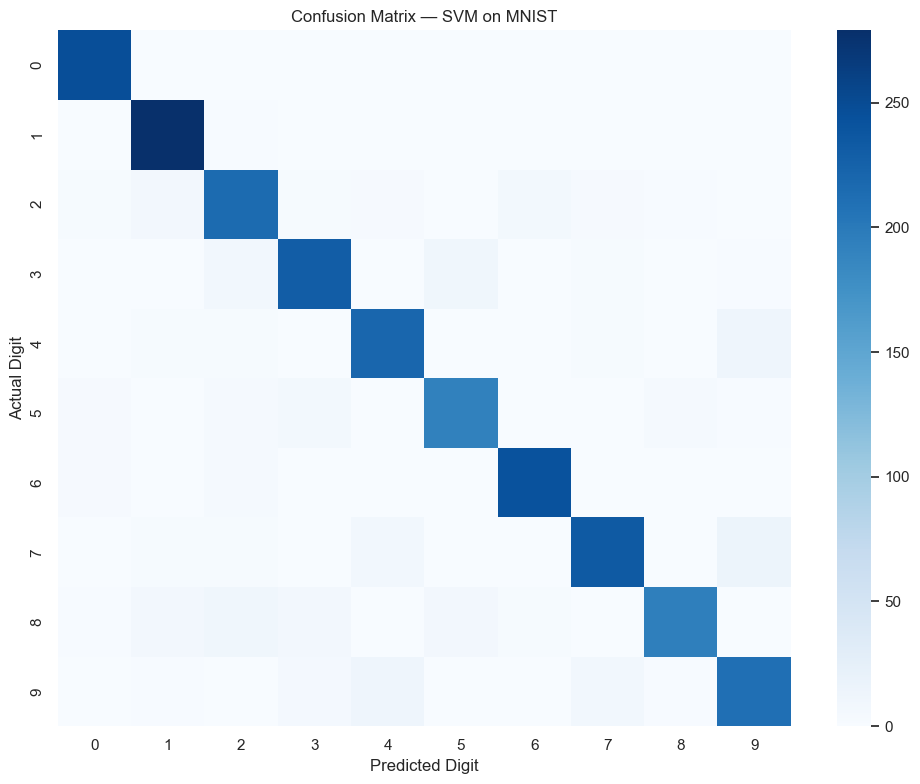

In [8]:
# Week 7 — Cell 8: Confusion Matrix

cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

# Visualize confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(
    cm,
    annot=False,          # too many cells to annotate clearly
    cmap="Blues",
    xticklabels=range(10),
    yticklabels=range(10)
)

plt.xlabel("Predicted Digit")
plt.ylabel("Actual Digit")
plt.title("Confusion Matrix — SVM on MNIST")
plt.tight_layout()
plt.show()


# Classification Report

In [9]:
# Week 7 — Cell 9: Classification Report

report = classification_report(
    y_test,
    y_pred,
    digits=4
)

print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0     0.9427    0.9880    0.9648       250
           1     0.9148    0.9894    0.9506       282
           2     0.8431    0.8669    0.8549       248
           3     0.8953    0.8953    0.8953       258
           4     0.8947    0.9020    0.8984       245
           5     0.8972    0.8889    0.8930       216
           6     0.9528    0.9565    0.9546       253
           7     0.9213    0.8764    0.8983       267
           8     0.9463    0.8220    0.8798       236
           9     0.8577    0.8612    0.8595       245

    accuracy                         0.9064      2500
   macro avg     0.9066    0.9047    0.9049      2500
weighted avg     0.9069    0.9064    0.9059      2500

